In [30]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [31]:
input_size = 1
output_size = 1
num_epochs = 2000
learning_rate = 0.0001

In [32]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [33]:
model = nn.Linear(input_size, output_size)

In [34]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [5/2000], Loss: 0.2186
Epoch [10/2000], Loss: 0.2171
Epoch [15/2000], Loss: 0.2158
Epoch [20/2000], Loss: 0.2146
Epoch [25/2000], Loss: 0.2135
Epoch [30/2000], Loss: 0.2125
Epoch [35/2000], Loss: 0.2115
Epoch [40/2000], Loss: 0.2107
Epoch [45/2000], Loss: 0.2099
Epoch [50/2000], Loss: 0.2092
Epoch [55/2000], Loss: 0.2085
Epoch [60/2000], Loss: 0.2079
Epoch [65/2000], Loss: 0.2073
Epoch [70/2000], Loss: 0.2068
Epoch [75/2000], Loss: 0.2063
Epoch [80/2000], Loss: 0.2059
Epoch [85/2000], Loss: 0.2055
Epoch [90/2000], Loss: 0.2051
Epoch [95/2000], Loss: 0.2048
Epoch [100/2000], Loss: 0.2045
Epoch [105/2000], Loss: 0.2042
Epoch [110/2000], Loss: 0.2040
Epoch [115/2000], Loss: 0.2037
Epoch [120/2000], Loss: 0.2035
Epoch [125/2000], Loss: 0.2033
Epoch [130/2000], Loss: 0.2031
Epoch [135/2000], Loss: 0.2029
Epoch [140/2000], Loss: 0.2028
Epoch [145/2000], Loss: 0.2026
Epoch [150/2000], Loss: 0.2025
Epoch [155/2000], Loss: 0.2024
Epoch [160/2000], Loss: 0.2023
Epoch [165/2000], Loss: 0.20

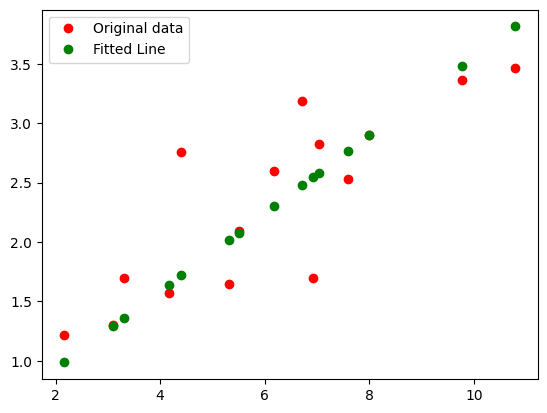

In [36]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, 'go', label='Fitted Line')
plt.legend()
plt.show()

In [37]:
torch.save(model.state_dict(), 'model.ckpt')